In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# A function to split a categorical column into dummy numeric columns of zeros and ones
def dummy_me(df,col):
    dummy = pd.get_dummies(df[col], drop_first=True)
    df = pd.concat([df,dummy], axis = 1)
    df.drop(col,axis= 1, inplace = True)
    return df


# A function to explore categorical data average Ad click rate, and the count to show sample size for each category
def explore(df,x,y):
    fig, ax = plt.subplots(2,figsize = (10,7))
    sns.barplot(df,x = x,y =y, ax = ax[0])
    sns.countplot(df,x = x, ax = ax[1])
    plt.tight_layout()

    
    
#Below re-engineered futures have been added:-
# 1) Normalized GDP: although it's very low correlated with Ad click, but was interesting to add to the study
# 2) Month Jan-July
# 3) Day of Wk sun = 1, sat = 7
# 4) Hour, I believe data is not enough to proof hours have an affect on Ad click, as it not showing any signifiacnt trend


df = pd.read_csv('advertising.csv')

# Dropping irrelevant columns
df = df[['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 #'GDP origin',
 'GDP',
 #'Timestamp',
 'Clicked on Ad',
 'Ad Topic Line',
 'Country',
 'Region',
 'Month',
 'DayOfWeek',
 'Hour'
        ]]

In [2]:
# Data overview
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,GDP,Clicked on Ad,Ad Topic Line,Country,Region,Month,DayOfWeek,Hour
0,68.95,35,61833.90,256.09,0,-0.21,0,Cloned,Tunisia,Africa,M3,D1,H0
1,80.23,31,68441.85,193.77,1,-0.25,0,Monitored,Nauru,Oceania,M4,D2,H1
2,69.47,26,59785.94,236.50,0,-0.25,0,Organic,San Marino,Europe,M3,D1,H20


### Exploring the Categorical Data

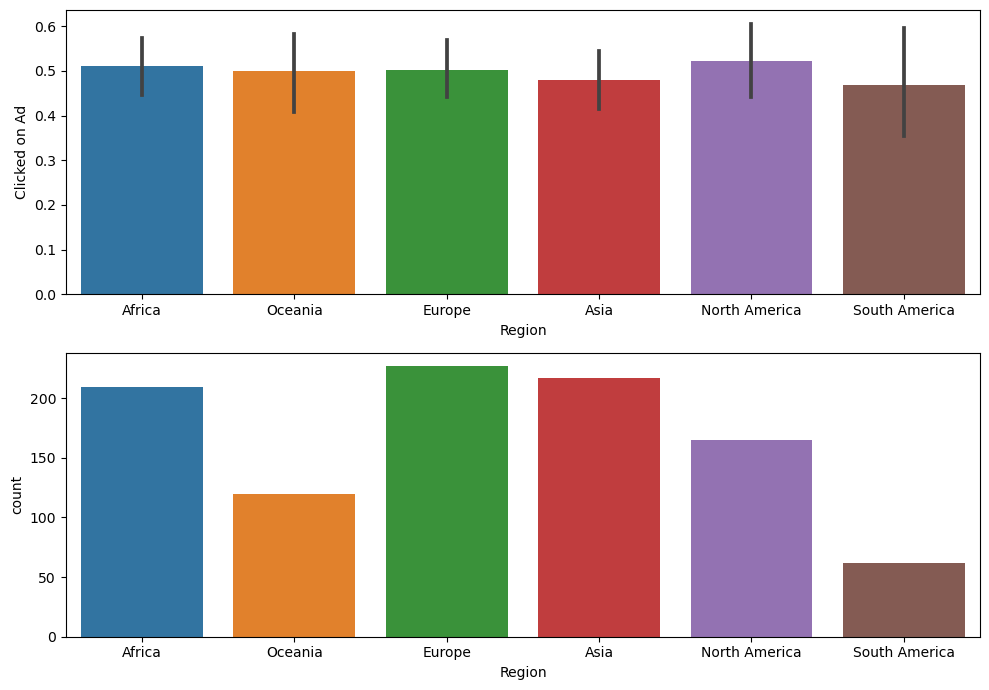

In [3]:
explore(df,'Region','Clicked on Ad')
# It appears that there are no major affect of Region on Ad clicking

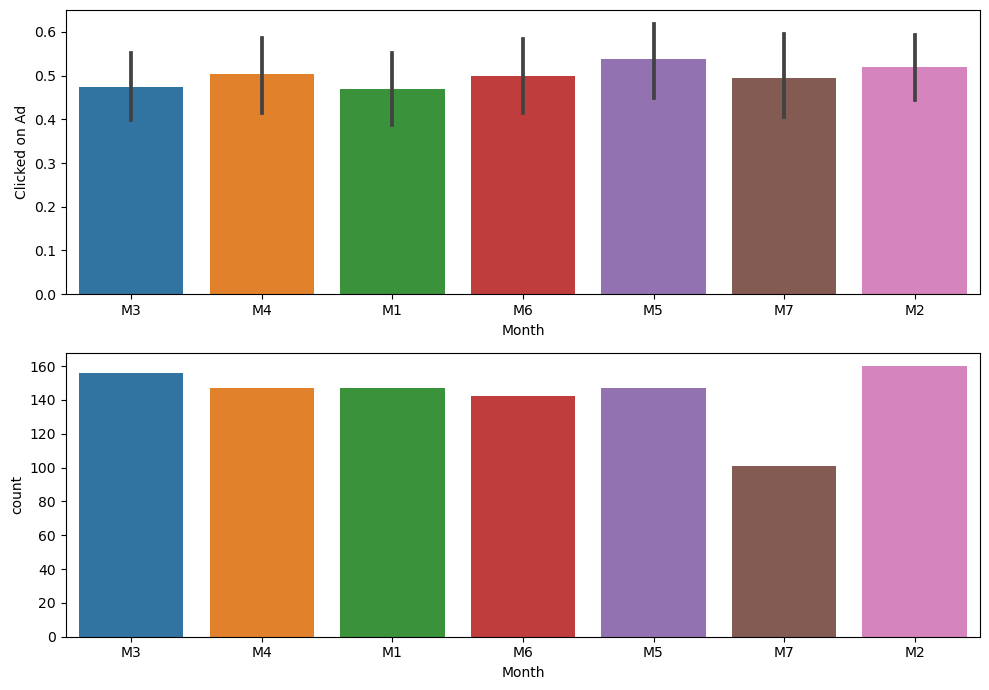

In [4]:
explore(df,'Month','Clicked on Ad')
# No major trend or differences due to differ in month of Ad

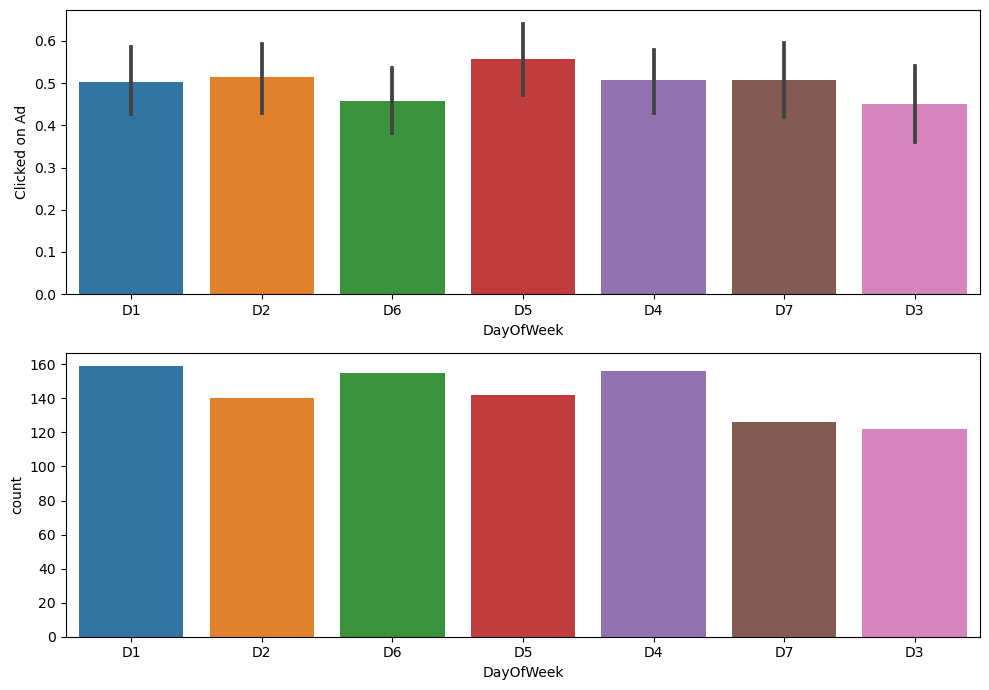

In [5]:
explore(df,'DayOfWeek','Clicked on Ad')
# Also not much to tell, but maybe the people tend to click more Ads on Thursday

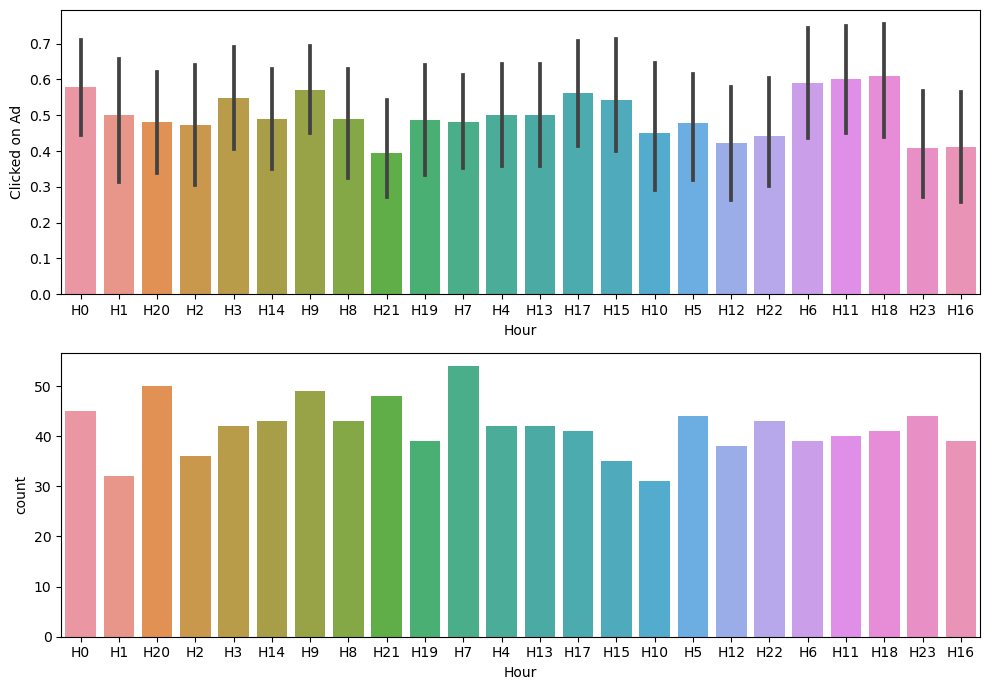

In [6]:
explore(df,'Hour','Clicked on Ad')
# Although a weird trend is shown,
# I believe it's due to small sample for each hour category (max observations about 50) as shown in countplot below the barplot

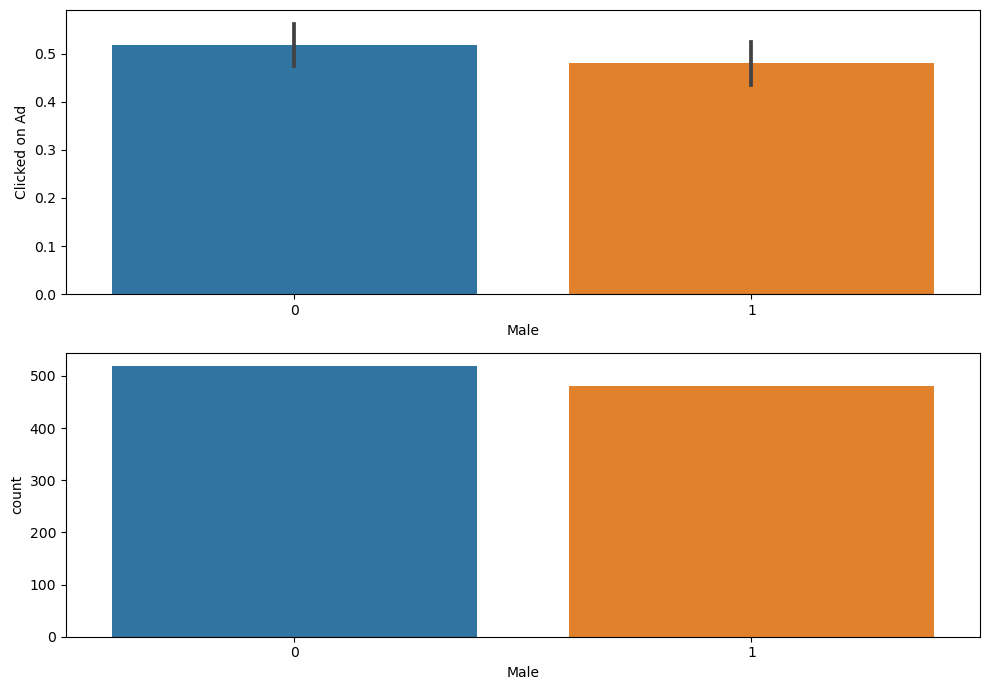

In [7]:
explore(df,'Male','Clicked on Ad')
# We may say that women are slightly more likely to click on Ads

### Exploring the Numeric Data

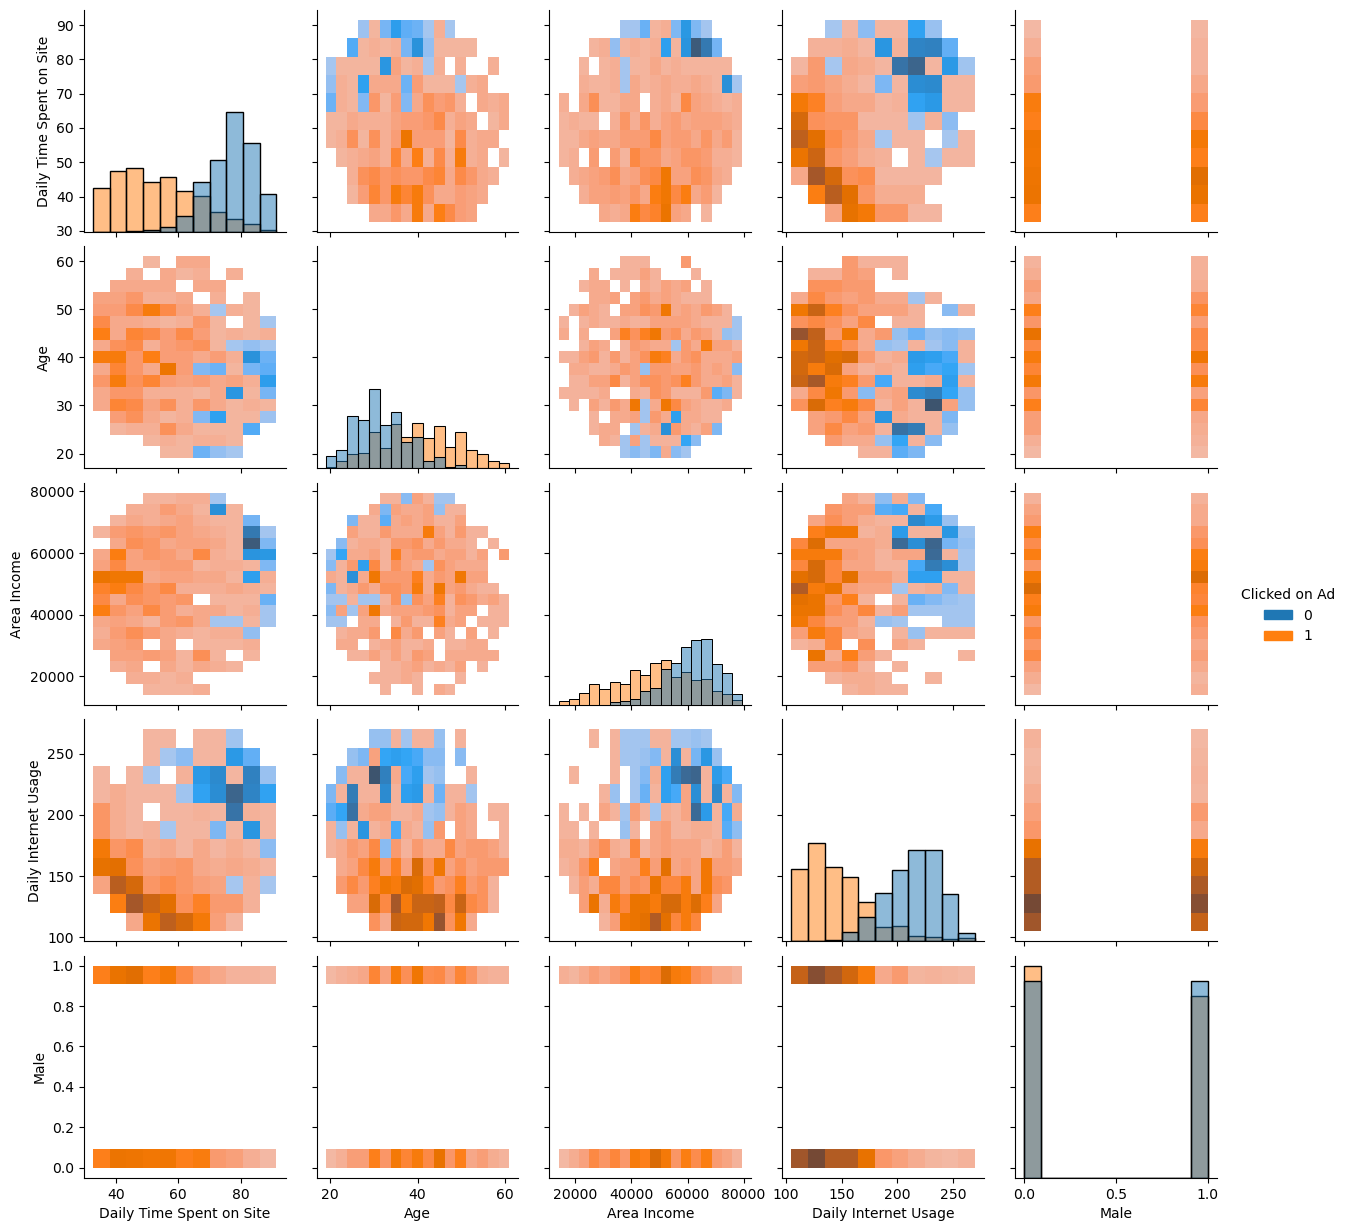

In [14]:
sns.pairplot(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage',
                 'Male', 'Clicked on Ad']], kind = 'hist', hue ='Clicked on Ad' )

<Axes: >

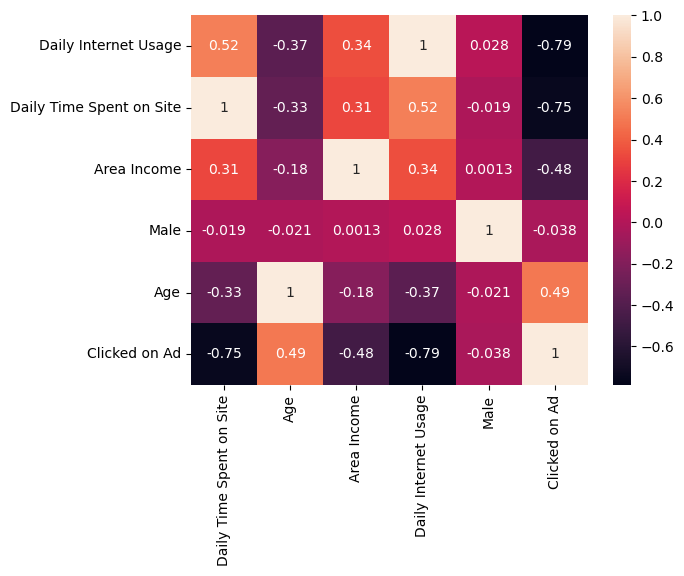

In [9]:
sns.heatmap(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male'
                ,'Clicked on Ad']].corr().sort_values('Clicked on Ad'), annot=True)


# For me the heat map was the best choice to show a much the numeric data affected Ad clicking more than the categrorical data
# Most variable affect the Ad clicking is 'Daily Internet Usage' then 'Daily Time Spent on Site'
# The more usage and time spend the less likely to click on Ad

In [10]:
# Data b4 break down the categories
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,GDP,Clicked on Ad,Ad Topic Line,Country,Region,Month,DayOfWeek,Hour
0,68.95,35,61833.90,256.09,0,-0.21,0,Cloned,Tunisia,Africa,M3,D1,H0
1,80.23,31,68441.85,193.77,1,-0.25,0,Monitored,Nauru,Oceania,M4,D2,H1
2,69.47,26,59785.94,236.50,0,-0.25,0,Organic,San Marino,Europe,M3,D1,H20


In [11]:
#convert each categorical data into dummy columns (0,1) using the predefined function
df = dummy_me(df,'Region')
df = dummy_me(df,'Ad Topic Line')
df = dummy_me(df,'Country')
df = dummy_me(df,'Month')
df = dummy_me(df,'DayOfWeek')
df = dummy_me(df,'Hour')



# Data after broken down the table into 382 columns
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,GDP,Clicked on Ad,Asia,Europe,North America,...,H21,H22,H23,H3,H4,H5,H6,H7,H8,H9
0,68.95,35,61833.90,256.09,0,-0.21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,-0.25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,-0.25,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Building the Model

In [12]:
# Define trainning and testing data
X = df.drop('Clicked on Ad', axis = 1)
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Feed the train data into the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# Predict X_test values and compare with actual y_test
predictions = pd.DataFrame(logmodel.predict(X_test), columns=['Predicted Survival'])


# Interpret Results
print(classification_report(y_test,predictions))
pd.DataFrame(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



,0,1
0,149,8
1,14,129


In [13]:
# Accuracy of 0.93 is relatively high.
# I believe High accuracy is due to high correlation between the numeric variables and Ad clicking that we are studing..